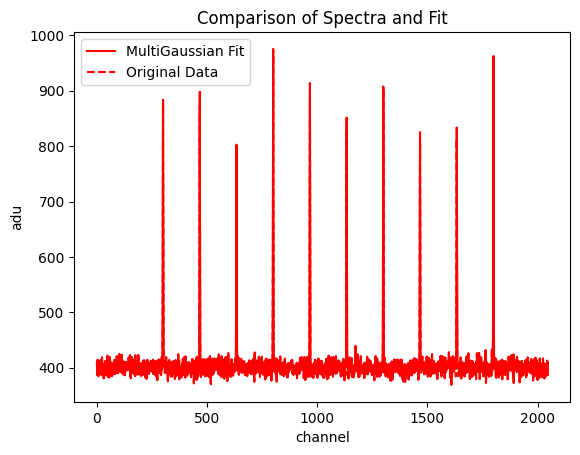

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from euv_fitting.calibrate.utils import MultiBatchGaussian

def gauss(x, amp, cen, sig):
  return amp / (sig * np.sqrt(2 * np.pi)) * np.exp(-(x - cen) ** 2 / (2 * sig ** 2))

x = np.linspace(0, 2047, 2048)

N_GAUSS = 10
AMPLITUDES = 1000 + np.random.random(size = N_GAUSS) * 500
CENTERS = np.linspace(300, 1800, N_GAUSS)
SIGMAS = np.minimum(2 + np.random.normal(0, 0.5, size = N_GAUSS), 1)

y = sum(gauss(x, amp, cen, sig) for amp, cen, sig in zip(AMPLITUDES, CENTERS, SIGMAS)) #Add amplitudes of each gaussian
y += np.random.normal(400, 10, size = 2048) #Add random gaussian noise

multi = MultiBatchGaussian(y, x, num_peaks = N_GAUSS)
#Note the x argument is optional. If not given, x defaults to np.linspace(0, len(y) - 1, len(y))

multi.fit()
multi.plot_fit(normalize_background = False)

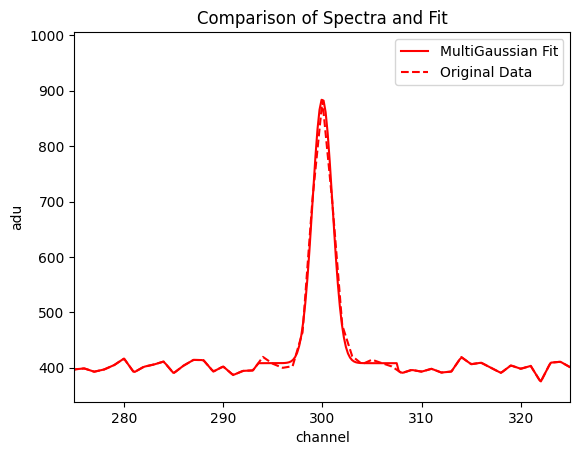

In [2]:
f, ax = plt.subplots() #Generate ax object for multi.plot_fit()
multi.plot_fit(ax = ax, normalize_background = False)
ax.set_xlim([275, 325])
plt.show()

In [3]:
best_fit_centers, best_fit_uncertainties = multi.get_centroids_ascending().T

#Print column headers
print(f"{'True Center':>14}, {'Fit Center':>14}, {'Fit Center Uncertainty':>20}")

for true_center, best_fit_center, best_fit_uncertainty in zip(
    CENTERS, best_fit_centers, best_fit_uncertainties):



  print(f'{true_center:14.3f}, {best_fit_center: 14.3f}, {best_fit_uncertainty: 20.3f}')

   True Center,     Fit Center, Fit Center Uncertainty
       300.000,        300.001,                0.017
       466.667,        466.661,                0.023
       633.333,        633.331,                0.029
       800.000,        799.995,                0.013
       966.667,        966.657,                0.016
      1133.333,       1133.371,                0.025
      1300.000,       1300.012,                0.016
      1466.667,       1466.660,                0.021
      1633.333,       1633.324,                0.026
      1800.000,       1800.020,                0.017


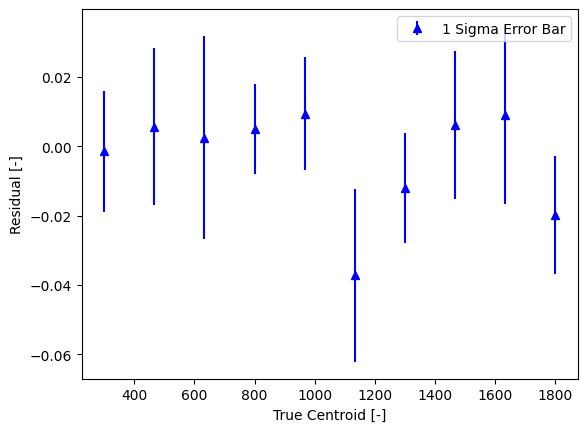

In [4]:
plt.errorbar(CENTERS, CENTERS - best_fit_centers,
              yerr = best_fit_uncertainties, fmt = '^b', label = '1 Sigma Error Bar')
plt.xlabel('True Centroid [-]')
plt.ylabel('Residual [-]')
plt.legend()
plt.show()